In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
rng = np.random.default_rng(123)

In [3]:
df_premios = pd.read_csv("actores premios.csv", header=0)
df_nominaciones = pd.read_csv("actores nominaciones.csv", header=0)

In [4]:
#df_premios
#df_nominaciones

In [5]:
#ref: https://www.python-graph-gallery.com/circular-barplot-with-groups
def get_label_rotation(angle, offset):
    #Rotation must be specified in degrees
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = 'right'
        rotation = rotation + 180
    else:
        alignment = 'left'
    return rotation, alignment

In [6]:
def add_labels(angles, values, labels, offset, ax):
    
    #This is the space between the end of the bar and the label
    padding = 4
    
    #Iterate over angles, values, and labels, to add all of them
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        #obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)
        
        #And finally add the text
        ax.text(
            x=angle,
            y=value + padding,
            s=label,
            ha=alignment,
            va='center',
            rotation=rotation,
            rotation_mode="anchor"
        )
    return

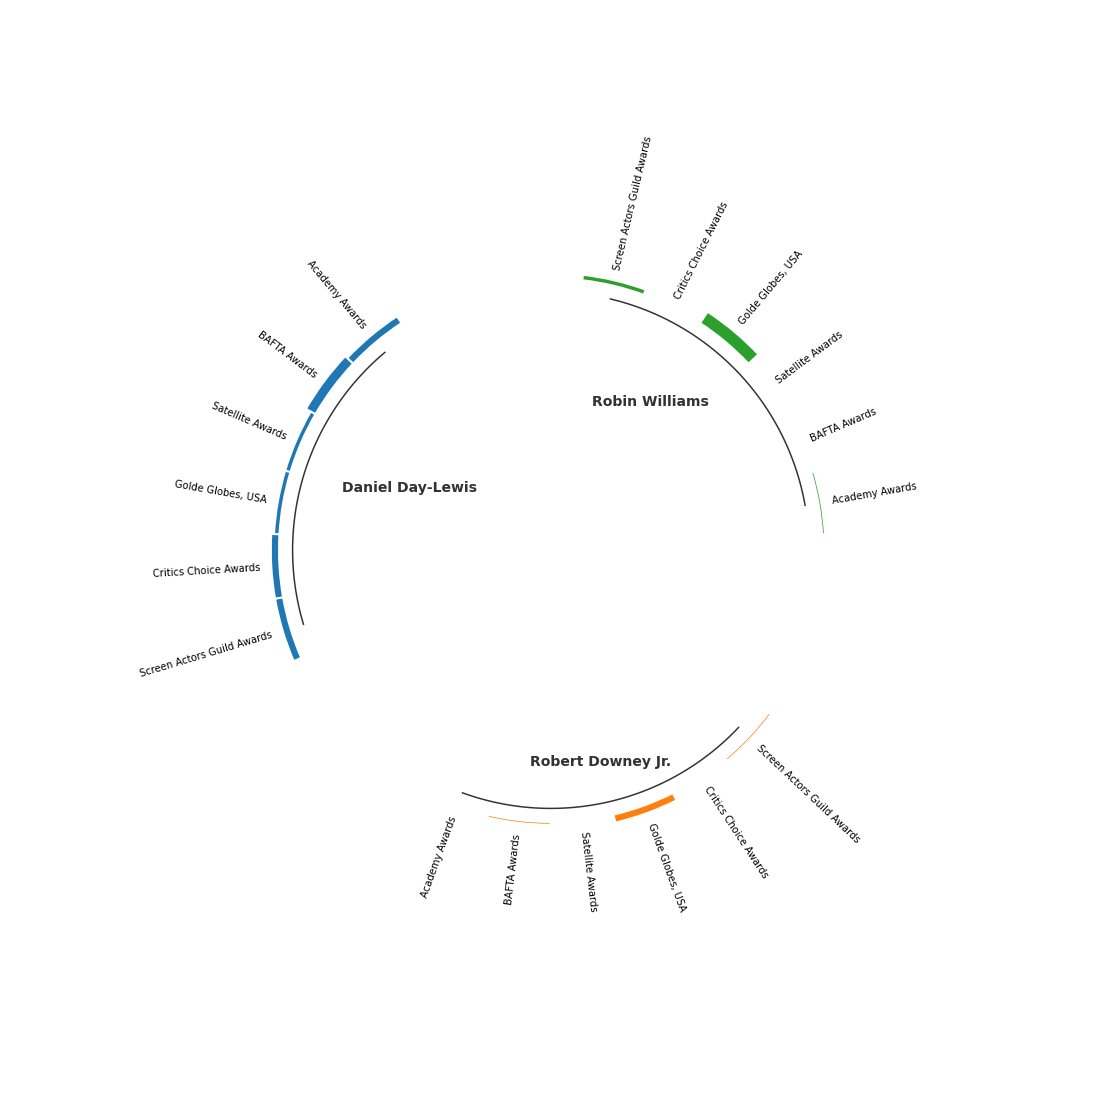

In [7]:
# Code from the ref. https://www.python-graph-gallery.com/circular-barplot-with-groups
OFFSET = np.pi / 2 
VALUES = df_premios["valores"].values
LABELS = df_premios["premios"].values
GROUP = df_premios["actor"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [6,6,6]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(40, 20), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [6, 6, 6]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["Daniel Day-Lewis", "Robert Downey Jr.", "Robin Williams"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    if(group == "Daniel Day-Lewis"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="left", va="center"
        )
    elif(group == "Robin Williams"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="right", va="center"
        )
    else:
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="center", va="center"
        )
    # Add reference lines at 20, 40, 60, and 80
    #x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    #ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

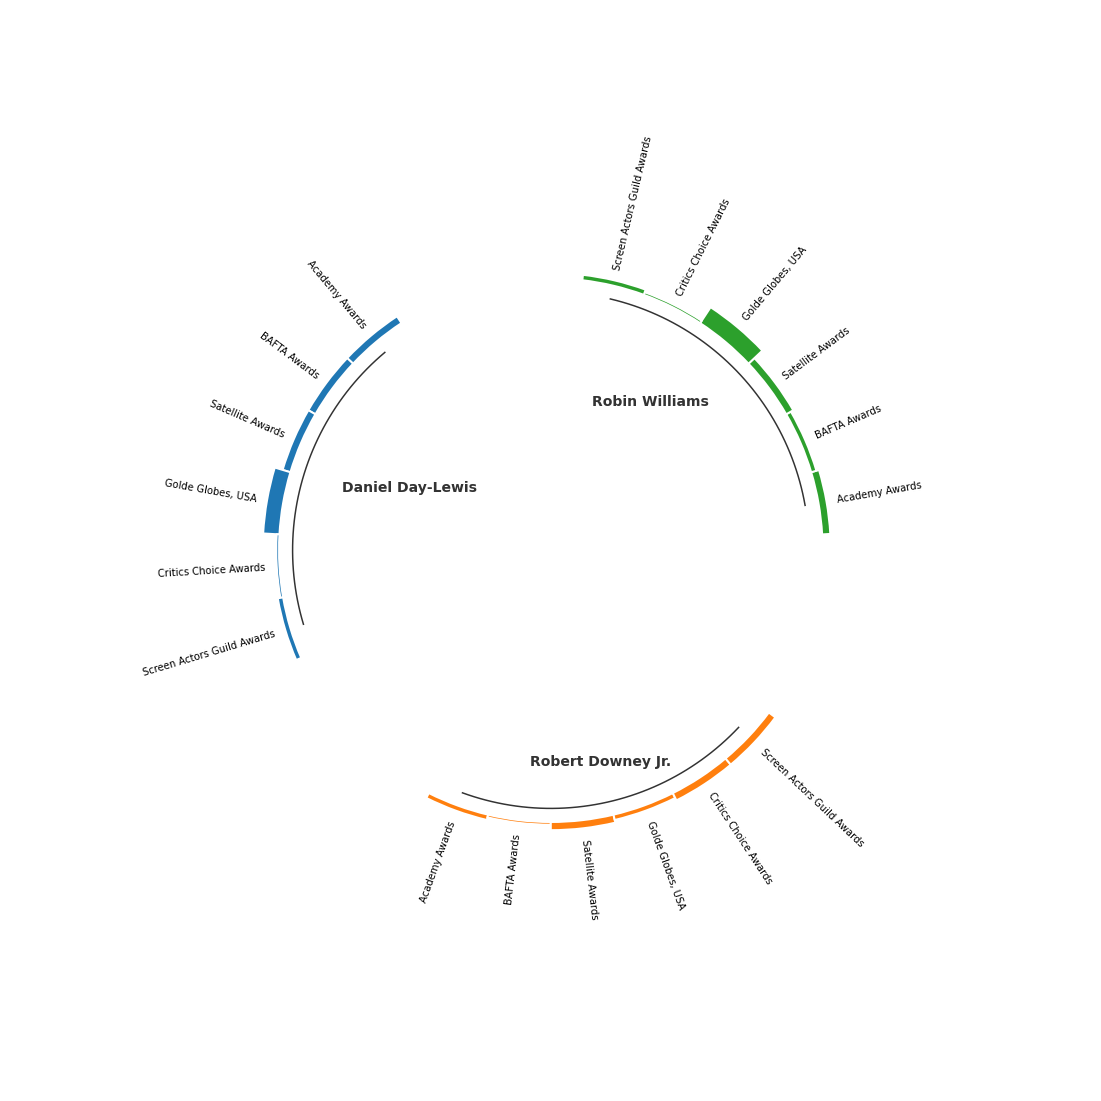

In [8]:
# All this part is like the code above
VALUES = df_nominaciones["valores"].values
LABELS = df_nominaciones["premios"].values
GROUP = df_nominaciones["actor"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [6,6,6]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(40, 20), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [6, 6, 6]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["Daniel Day-Lewis", "Robert Downey Jr.", "Robin Williams"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    if(group == "Daniel Day-Lewis"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="left", va="center"
        )
    elif(group == "Robin Williams"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="right", va="center"
        )
    else:
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="center", va="center"
        )
    # Add reference lines at 20, 40, 60, and 80
    #x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    #ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

In [9]:
#oscar = [3, 0, 1]
#bafta = [4, 1, 0]
#satellite = [2, 0, 0]
#golden = [2, 3, 5]
#critics = [3,0, 0]
#screen = [3, 1, 2]
#nombres = ["Daniel Day-Lewis", "Robert Downey Jr.", "Robin Williams"]

In [10]:
#set data
"""
df = pd.DataFrame({
    'group': nombres,
    'Academy Awards': oscar,
    'Satellite Awards': satellite,
    'Critics Choice Awards': critics,
    'BAFTA Awards': bafta,
    'Golde Globes, USA': golden,
    'Screen Actors Guild Awards': screen
})
"""
df = pd.read_csv("actores premios radar.csv", header=0)
df

,group,Academy Awards,Satellite Awards,Critics Choice Awards,BAFTA Awards,"Golde Globes, USA",Screen Actors Guild Awards
0,Daniel Day-Lewis,3,2,3,4,2,3
1,Robert Downey Jr.,0,0,0,1,3,1
2,Robin Williams,1,0,0,0,5,2


In [11]:
#df.to_csv("actores premios radar.csv", index=False)

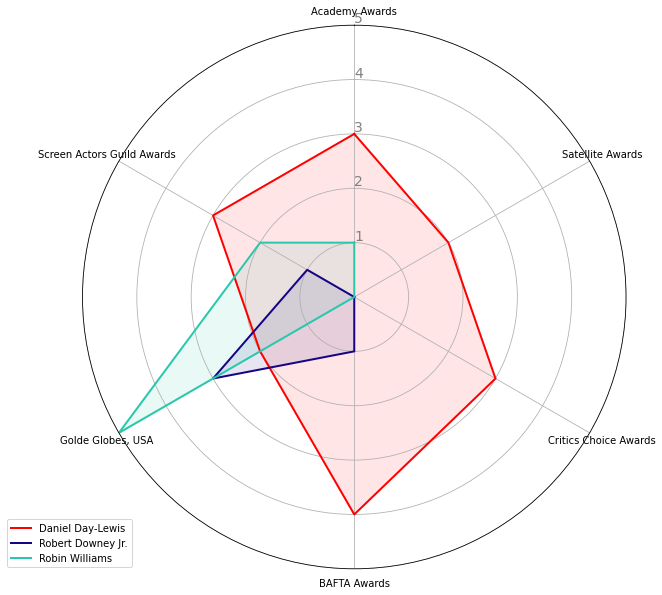

In [12]:
#Background, ref: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# number of variable
categories = list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot /number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

#Initialise the spoder plot
#ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=14)
plt.ylim(0,5)

#Add plots

#Plot each individual = each line of the data

# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, color='#FF0000', linestyle='solid', label="Daniel Day-Lewis")
ax.fill(angles, values, '#FF0000', alpha=0.1)

# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, color='#150485', linestyle='solid', label="Robert Downey Jr.")
ax.fill(angles, values, '#150485', alpha=0.1)

#Ind 3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, color= "#29C7AC",linestyle='solid', label="Robin Williams")
ax.fill(angles, values, '#29C7AC', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#show the graph
plt.show()

In [13]:
#oscar = [6, 2, 4]
#bafta = [7, 2, 2]
#satellite = [5, 3, 3]
#golden = [8, 5, 12]
#critics = [4,3, 1]
#screen = [5, 4, 4]
#nombres = ["Daniel Day-Lewis", "Robert Downey Jr.", "Robin Williams"]

In [14]:
#set data
"""
df2 = pd.DataFrame({
    'group': nombres,
    'Academy Awards': oscar,
    'Satellite Awards': satellite,
    'Critics Choice Awards': critics,
    'BAFTA Awards': bafta,
    'Golde Globes, USA': golden,
    'Screen Actors Guild Awards': screen
})
"""
df2 = pd.read_csv("actores nominaciones chart.csv", header=0)
df2

,group,Academy Awards,Satellite Awards,Critics Choice Awards,BAFTA Awards,"Golde Globes, USA",Screen Actors Guild Awards
0,Daniel Day-Lewis,6,5,4,7,8,5
1,Robert Downey Jr.,2,3,3,2,5,4
2,Robin Williams,4,3,1,2,12,4


In [15]:
#df2.to_csv("actores nominaciones chart.csv", index=False)

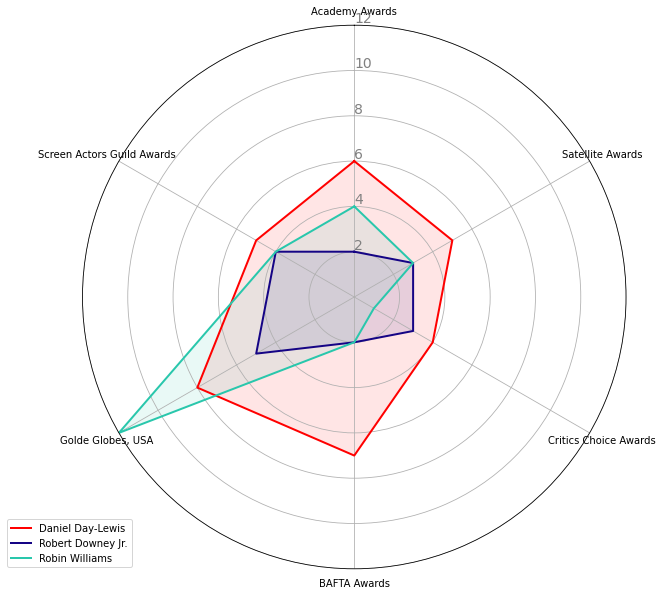

In [16]:
#Background, https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# number of variable
categories = list(df2)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot /number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

#Initialise the spoder plot
#ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2, 4, 6, 8, 10, 12], ["2", "4", "6", "8", "10", "12",], color="grey", size=14)
#plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12",], color="grey", size=14)
plt.ylim(0,12)

#Add plots

#Plot each individual = each line of the data

# Ind1
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, color='#FF0000', linestyle='solid', label="Daniel Day-Lewis")
ax.fill(angles, values, '#FF0000', alpha=0.1)

# Ind2
values=df2.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, color='#150485', linestyle='solid', label="Robert Downey Jr.")
ax.fill(angles, values, '#150485', alpha=0.1)

#Ind 3
values=df2.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, color='#29C7AC', linestyle='solid', label="Robin Williams")
ax.fill(angles, values, '#29C7AC', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#Add title
#plt.title('Cantidad de nominaciones', loc='left', fontsize=15)

#show the graph
plt.show()

In [17]:
#punta = [79.80, 24.58, 49.07, 66.37, 66.68, 44.03]
#puerto = [69.44, 38.90, 42.16, 48.20, 67.86, 50.51]
#valparaiso = [70.76, 20.45, 39.66, 59.94, 60.68, 30.70]
#labels = ["Condiciones Laborales", "Ambiente de Negocios", "Condiciones Socioculturales", "Conectividad y Movilidad", "Salud y Medio Ambiente", "Vivienda y Entorno"]*3
#ciudades = ["Punta Arenas"]*6 + ["Puerto Varas"]*6 + ["Valparaiso"]*6

In [18]:
"""
dfc = pd.DataFrame({
    'valores': punta + puerto + valparaiso,
    'labels': labels,
    'ciudades': ciudades
})
"""
dfc = pd.read_csv("ciudades.csv", header=0)
dfc.head(5)

,valores,labels,ciudades
0,79.80,Condiciones Laborales,Punta Arenas
1,24.58,Ambiente de Negocios,Punta Arenas
2,49.07,Condiciones Socioculturales,Punta Arenas
3,66.37,Conectividad y Movilidad,Punta Arenas
4,66.68,Salud y Medio Ambiente,Punta Arenas


In [19]:
#dfc.to_csv("ciudades.csv", index=False)

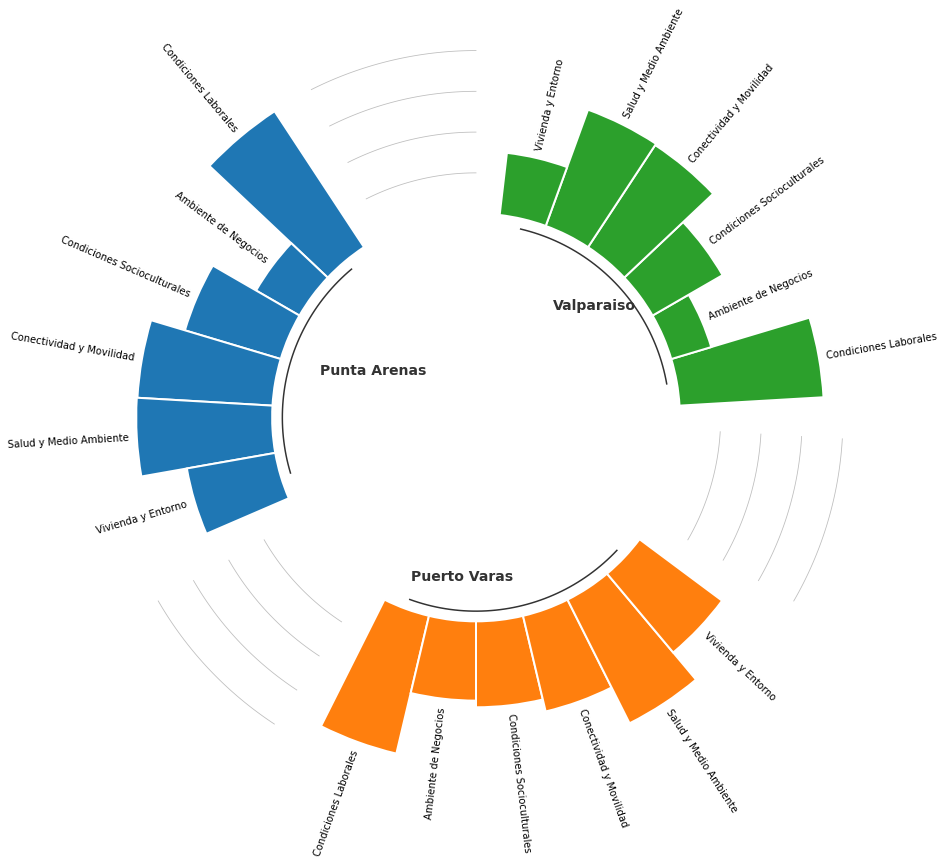

In [20]:
# All this part is like the code above
## Code from the ref. https://www.python-graph-gallery.com/circular-barplot-with-groups
OFFSET = np.pi / 2 
VALUES = dfc["valores"].values
LABELS = dfc["labels"].values
GROUP = dfc["ciudades"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [6,6,6]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(24, 15), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [6, 6, 6]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["Punta Arenas", "Puerto Varas", "Valparaiso"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    if(group == "Punta Arenas"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="left", va="center"
        )
    elif(group == "Puerto Varas"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="right", va="center"
        )
    else:
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=14, 
            fontweight="bold", ha="center", va="center"
        )
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

In [21]:
#condiciones_laborales = [79.80, 69.44, 70.76]
#ambiente = [24.58, 38.90, 20.45]
#condiciones_socio = [49.07, 42.16, 39.66]
#conectividad = [66.37, 48.20, 59.94]
#salud = [66.68, 67.86, 44.03]
#vivienda = [44.03, 50.51, 30.70]
#ICVU = [55.09, 52.79, 47.05]
#labels = ["Condiciones Laborales"]*3 + ["Ambiente de Negocios"]*3 +  ["Condiciones Socioculturales"]*3 + ["Conectividad y Movilidad"]*3 + ["Salud y Medio Ambiente"]*3 + ["Vivienda y Entorno"]*3 + ["ICVU"]*3
#ciudades = ["Punta Arenas", "Puerto Varas", "Valparaiso"]*7

In [22]:
"""
dfc = pd.DataFrame({
    'valores': condiciones_laborales + ambiente + condiciones_socio + conectividad + salud + vivienda + ICVU,
    'labels': labels,
    'ciudades': ciudades
})
"""
dfc = pd.read_csv("ciudades 2.csv", header=0)

In [23]:
dfc.head(3)

,valores,labels,ciudades
0,79.80,Condiciones Laborales,Punta Arenas
1,69.44,Condiciones Laborales,Puerto Varas
2,70.76,Condiciones Laborales,Valparaiso


In [24]:
#dfc.to_csv("ciudades 2.csv", index=False)

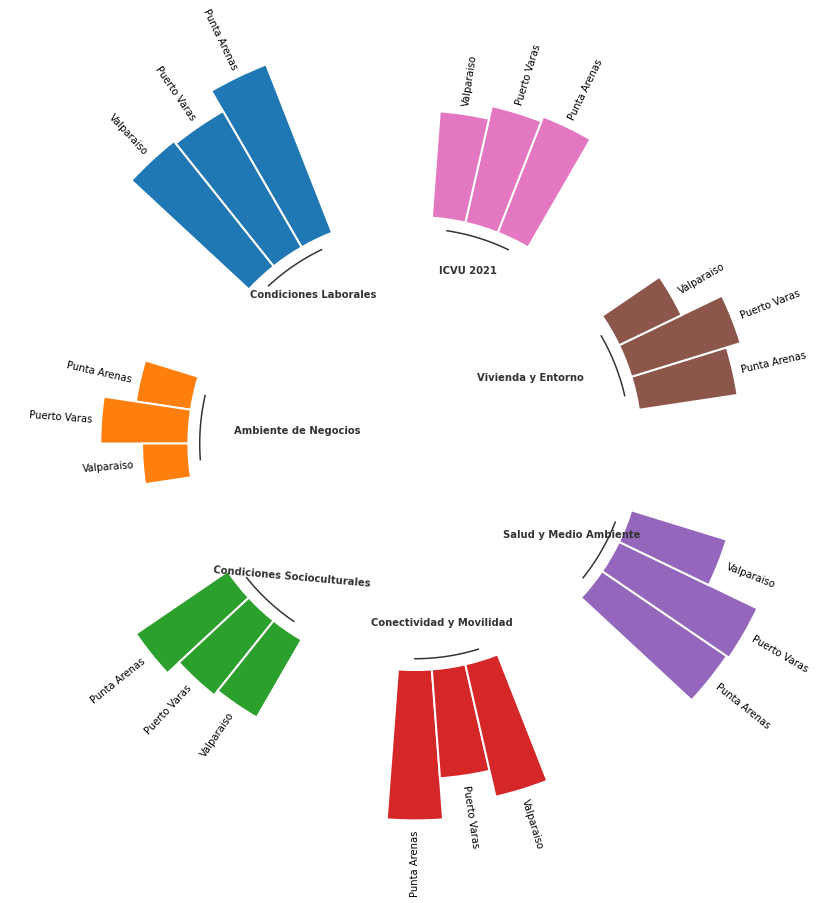

In [25]:
# All this part is like the code above
## Code from the ref. https://www.python-graph-gallery.com/circular-barplot-with-groups
OFFSET = np.pi / 2 
VALUES = dfc["valores"].values
LABELS = dfc["ciudades"].values
GROUP = dfc["labels"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [3]*7
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(24, 15), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 80)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [3]*7
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["Condiciones Laborales", "Ambiente de Negocios", "Condiciones Socioculturales", 
                       "Conectividad y Movilidad", "Salud y Medio Ambiente", "Vivienda y Entorno", "ICVU 2021"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    if(group == "Ambiente de Negocios"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=10, 
            fontweight="bold", ha="left", va="center"
        )
    elif(group == "Vivienda y Entorno"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=10, 
            fontweight="bold", ha="right", va="center"
        )
    elif(group == "Condiciones Socioculturales"):
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=10, 
            fontweight="bold", ha="center", rotation="-5.", va="center"
        )
    else:
        ax.text(
            np.mean(x1), -20, group, color="#333333", fontsize=10, 
            fontweight="bold", ha="center", va="center"
        )
    # Add reference lines at 20, 40, 60, and 80
    #x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    #ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD